In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import pandas as pd
import numpy as np

In [68]:
dataset=pd.read_csv("dataset.csv")
dataset=dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [69]:
columns=dataset.columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_columns=[0, 2, 3, 4, 5]
for i in le_columns:
    dataset[columns[i]]=le.fit_transform(dataset[columns[i]])

dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,196,1,1,1,1,156,1.850000e+09,61666.67
1,192,1,1,1,1,156,1.850000e+09,61666.67
2,219,2,1,1,1,117,5.500000e+08,18333.33
3,238,2,1,1,1,152,9.025000e+08,30083.33
4,29,2,1,1,1,150,7.000000e+09,233333.33


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   int64  
 3   Warehouse   3456 non-null   int64  
 4   Elevator    3456 non-null   int64  
 5   Address     3456 non-null   int64  
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 243.0 KB


In [71]:
dataset.drop("Price", axis=1, inplace=True)

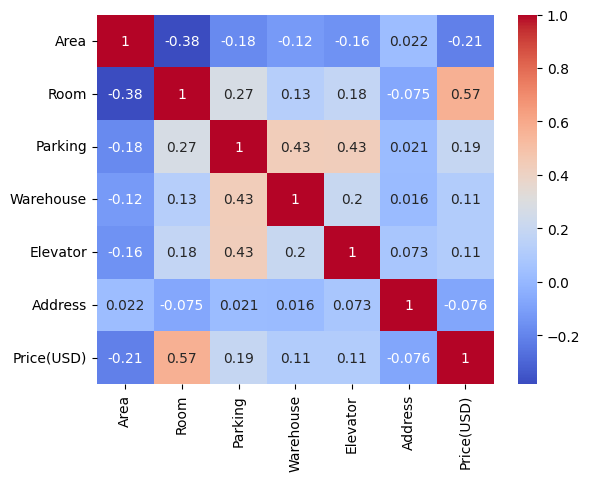

In [72]:
corr=dataset.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler
sc_columns=[1, 6]
columns=dataset.columns
for i in sc_columns:
    sc=StandardScaler()
    dataset[[columns[i]]]=sc.fit_transform(dataset[[columns[i]]])

from scipy import stats
z_score=np.abs(stats.zscore(dataset))
dataset=dataset[(z_score<4).all(axis=1)]

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3415 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3415 non-null   int64  
 1   Room        3415 non-null   float64
 2   Parking     3415 non-null   int64  
 3   Warehouse   3415 non-null   int64  
 4   Elevator    3415 non-null   int64  
 5   Address     3415 non-null   int64  
 6   Price(USD)  3415 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 213.4 KB


In [75]:
from sklearn.model_selection import train_test_split
x=dataset.drop("Price(USD)", axis=1)
y=dataset[["Price(USD)"]]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.15)


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [77]:
err=10000
index=0
for i in range(10):
    lr=LinearRegression()
    pf=PolynomialFeatures(degree=i)
    x_train_tmp=pf.fit_transform(x_train)
    lr.fit(x_train_tmp, y_train)
    pred=lr.predict(pf.fit_transform(x_test))
    rmse=root_mean_squared_error(y_test, pred)
    print(i, rmse)
    if(rmse<err):
        err=rmse
        index=i

#this shows the best model:
print("index: ", index, "\tr2: ", err)
print("\n\n")

lr=LinearRegression()
pf=PolynomialFeatures(degree=index)
x_train_tmp=pf.fit_transform(x_train)
lr.fit(x_train_tmp, y_train)

x_test_tmp=pf.fit_transform(x_test)
y_pred=lr.predict(x_test_tmp)

0 0.6969825240645768
1 0.561897068186124
2 0.48748292854783526
3 0.42700949756462286
4 0.3905545259948591
5 0.37931761094801153
6 0.3996180383752775
7 0.44187733505051613
8 0.6953590068924907
9 0.7848008728449529
index:  5 	r2:  0.37931761094801153





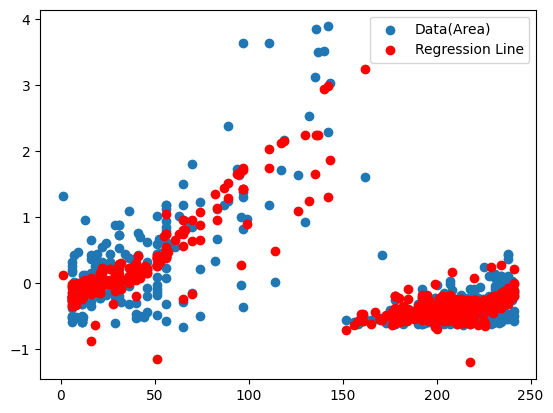

In [78]:
plt.scatter(x_test["Area"], y_test, label="Data(Area)")
plt.scatter(x_test["Area"], y_pred, label="Regression Line", color="red")
plt.legend()
plt.show()